In [53]:
import pandas as pd
df = pd.read_excel('vehicle_emission.xls', index_col=0)
df

,Make,Yr,Fuel,Vehicle,Use,CO,CO2,O2,HC,Age
1,Honda,2006,Petrol,Car,Commercial,0,13.5,1.55,0,8
2,Honda,2007,Petrol,Jeep,Commercial,0,14.7,0.08,10,7
3,Toyota,2011,Petrol,Car,Commercial,0,14.6,0.72,1,3
4,Toyota,1998,Petrol,Car,Official,0,10.2,3.15,1,16
5,Toyota,2002,Petrol,Car,Official,0,14.5,0.60,1,12
6,Toyota,2002,Petrol,Jeep,Official,0,12.9,1.52,4,12
7,Honda,1993,Petrol,Car,Private,0,12.5,2.80,34,21
8,Honda,1993,Petrol,Car,Private,0,5.3,5.30,697,21
9,Volswagen,1994,Petrol,Car,Private,0,12.5,12.50,4,20
10,Nissan,1997,Petrol,Jeep,Private,0,13.6,5.30,4,17


In [54]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=200, random_state=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

# regr.predict(X_test[:2])

# regr.score(X_test, y_test)

In [55]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()

# vec.fit_transform(measurements).toarray()

In [56]:
df

,Make,Yr,Fuel,Vehicle,Use,CO,CO2,O2,HC,Age
1,Honda,2006,Petrol,Car,Commercial,0,13.5,1.55,0,8
2,Honda,2007,Petrol,Jeep,Commercial,0,14.7,0.08,10,7
3,Toyota,2011,Petrol,Car,Commercial,0,14.6,0.72,1,3
4,Toyota,1998,Petrol,Car,Official,0,10.2,3.15,1,16
5,Toyota,2002,Petrol,Car,Official,0,14.5,0.60,1,12
6,Toyota,2002,Petrol,Jeep,Official,0,12.9,1.52,4,12
7,Honda,1993,Petrol,Car,Private,0,12.5,2.80,34,21
8,Honda,1993,Petrol,Car,Private,0,5.3,5.30,697,21
9,Volswagen,1994,Petrol,Car,Private,0,12.5,12.50,4,20
10,Nissan,1997,Petrol,Jeep,Private,0,13.6,5.30,4,17


In [57]:
df_cols = df[['Make','Fuel', 'Vehicle','Use']]
df_cols

,Make,Fuel,Vehicle,Use
1,Honda,Petrol,Car,Commercial
2,Honda,Petrol,Jeep,Commercial
3,Toyota,Petrol,Car,Commercial
4,Toyota,Petrol,Car,Official
5,Toyota,Petrol,Car,Official
6,Toyota,Petrol,Jeep,Official
7,Honda,Petrol,Car,Private
8,Honda,Petrol,Car,Private
9,Volswagen,Petrol,Car,Private
10,Nissan,Petrol,Jeep,Private


In [58]:
dfw = df.copy()
for c in df_cols.columns:
    print(c)
    df1 = df_cols[[c]]
    dic1 = df1.to_dict('records')
    aMake =vec.fit_transform(dic1).toarray()
    df2 = pd.DataFrame(aMake)
    # start index
    df2.index += 1
    # rename columns
    df2.columns = [c + str(x)  for x in df2.columns]
    dfw = pd.concat([dfw, df2], axis=1)

Make
Fuel
Vehicle
Use


In [59]:
df

,Make,Yr,Fuel,Vehicle,Use,CO,CO2,O2,HC,Age
1,Honda,2006,Petrol,Car,Commercial,0,13.5,1.55,0,8
2,Honda,2007,Petrol,Jeep,Commercial,0,14.7,0.08,10,7
3,Toyota,2011,Petrol,Car,Commercial,0,14.6,0.72,1,3
4,Toyota,1998,Petrol,Car,Official,0,10.2,3.15,1,16
5,Toyota,2002,Petrol,Car,Official,0,14.5,0.60,1,12
6,Toyota,2002,Petrol,Jeep,Official,0,12.9,1.52,4,12
7,Honda,1993,Petrol,Car,Private,0,12.5,2.80,34,21
8,Honda,1993,Petrol,Car,Private,0,5.3,5.30,697,21
9,Volswagen,1994,Petrol,Car,Private,0,12.5,12.50,4,20
10,Nissan,1997,Petrol,Jeep,Private,0,13.6,5.30,4,17


In [60]:
dfw

,Make,Yr,Fuel,Vehicle,Use,CO,CO2,O2,HC,Age,Make0,Make1,Make2,Make3,Fuel0,Vehicle0,Vehicle1,Use0,Use1,Use2
1,Honda,2006,Petrol,Car,Commercial,0,13.5,1.55,0,8,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,Honda,2007,Petrol,Jeep,Commercial,0,14.7,0.08,10,7,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,Toyota,2011,Petrol,Car,Commercial,0,14.6,0.72,1,3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,Toyota,1998,Petrol,Car,Official,0,10.2,3.15,1,16,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
5,Toyota,2002,Petrol,Car,Official,0,14.5,0.60,1,12,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6,Toyota,2002,Petrol,Jeep,Official,0,12.9,1.52,4,12,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7,Honda,1993,Petrol,Car,Private,0,12.5,2.80,34,21,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
8,Honda,1993,Petrol,Car,Private,0,5.3,5.30,697,21,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
9,Volswagen,1994,Petrol,Car,Private,0,12.5,12.50,4,20,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
10,Nissan,1997,Petrol,Jeep,Private,0,13.6,5.30,4,17,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [61]:
import sklearn.preprocessing as preprocessing
X = df[['Age','CO2','CO2','O2','HC']].to_numpy()
X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized

array([[0.38539003, 0.65034568, 0.65034568, 0.07466932, 0.        ],
       [0.29036236, 0.60976096, 0.60976096, 0.00331843, 0.41480337],
       [0.143536  , 0.69854189, 0.69854189, 0.03444864, 0.04784533],
       [0.73412842, 0.46800687, 0.46800687, 0.14453153, 0.04588303],
       [0.50446001, 0.60955585, 0.60955585, 0.025223  , 0.04203833],
       [0.53928886, 0.57973553, 0.57973553, 0.06830992, 0.17976295],
       [0.47958957, 0.28546998, 0.28546998, 0.06394528, 0.77647835],
       [0.03011285, 0.00759991, 0.00759991, 0.00759991, 0.99945982],
       [0.67238762, 0.42024226, 0.42024226, 0.42024226, 0.13447752],
       [0.64116258, 0.51293007, 0.51293007, 0.19989186, 0.15086178]])

In [62]:
df2 = pd.DataFrame(X_normalized)

# start index
df2.index += 1
df2.columns = ['Age0','CO20','CO20','O20','HC0']
dfw = pd.concat([dfw, df2], axis=1)
dfw

,Make,Yr,Fuel,Vehicle,Use,CO,CO2,O2,HC,Age,...,Vehicle0,Vehicle1,Use0,Use1,Use2,Age0,CO20,CO20,O20,HC0
1,Honda,2006,Petrol,Car,Commercial,0,13.5,1.55,0,8,...,1.0,0.0,1.0,0.0,0.0,0.385390,0.650346,0.650346,0.074669,0.000000
2,Honda,2007,Petrol,Jeep,Commercial,0,14.7,0.08,10,7,...,0.0,1.0,1.0,0.0,0.0,0.290362,0.609761,0.609761,0.003318,0.414803
3,Toyota,2011,Petrol,Car,Commercial,0,14.6,0.72,1,3,...,1.0,0.0,1.0,0.0,0.0,0.143536,0.698542,0.698542,0.034449,0.047845
4,Toyota,1998,Petrol,Car,Official,0,10.2,3.15,1,16,...,1.0,0.0,0.0,1.0,0.0,0.734128,0.468007,0.468007,0.144532,0.045883
5,Toyota,2002,Petrol,Car,Official,0,14.5,0.60,1,12,...,1.0,0.0,0.0,1.0,0.0,0.504460,0.609556,0.609556,0.025223,0.042038
6,Toyota,2002,Petrol,Jeep,Official,0,12.9,1.52,4,12,...,0.0,1.0,0.0,1.0,0.0,0.539289,0.579736,0.579736,0.068310,0.179763
7,Honda,1993,Petrol,Car,Private,0,12.5,2.80,34,21,...,1.0,0.0,0.0,0.0,1.0,0.479590,0.285470,0.285470,0.063945,0.776478
8,Honda,1993,Petrol,Car,Private,0,5.3,5.30,697,21,...,1.0,0.0,0.0,0.0,1.0,0.030113,0.007600,0.007600,0.007600,0.999460
9,Volswagen,1994,Petrol,Car,Private,0,12.5,12.50,4,20,...,1.0,0.0,0.0,0.0,1.0,0.672388,0.420242,0.420242,0.420242,0.134478
10,Nissan,1997,Petrol,Jeep,Private,0,13.6,5.30,4,17,...,0.0,1.0,0.0,0.0,1.0,0.641163,0.512930,0.512930,0.199892,0.150862


In [63]:
from sklearn.preprocessing import MinMaxScaler

data = df[['Age','CO2','CO2','O2','HC']].to_numpy()

scaler = MinMaxScaler()
print(scaler.fit(data))
print((scaler.data_min_, scaler.data_max_))

data_normalized = scaler.transform(data)

data_normalized


MinMaxScaler()
(array([3.  , 5.3 , 5.3 , 0.08, 0.  ]), array([ 21. ,  14.7,  14.7,  12.5, 697. ]))


array([[0.27777778, 0.87234043, 0.87234043, 0.11835749, 0.        ],
       [0.22222222, 1.        , 1.        , 0.        , 0.0143472 ],
       [0.        , 0.9893617 , 0.9893617 , 0.05152979, 0.00143472],
       [0.72222222, 0.5212766 , 0.5212766 , 0.24718196, 0.00143472],
       [0.5       , 0.9787234 , 0.9787234 , 0.04186795, 0.00143472],
       [0.5       , 0.80851064, 0.80851064, 0.11594203, 0.00573888],
       [1.        , 0.76595745, 0.76595745, 0.21900161, 0.04878049],
       [1.        , 0.        , 0.        , 0.42028986, 1.        ],
       [0.94444444, 0.76595745, 0.76595745, 1.        , 0.00573888],
       [0.77777778, 0.88297872, 0.88297872, 0.42028986, 0.00573888]])

In [64]:
df2 = pd.DataFrame(data_normalized)

# start index
df2.index += 1
df2.columns = ['Age1','CO21','CO21','O21','HC1']
dfw = pd.concat([dfw, df2], axis=1)
dfw

,Make,Yr,Fuel,Vehicle,Use,CO,CO2,O2,HC,Age,...,Age0,CO20,CO20,O20,HC0,Age1,CO21,CO21,O21,HC1
1,Honda,2006,Petrol,Car,Commercial,0,13.5,1.55,0,8,...,0.385390,0.650346,0.650346,0.074669,0.000000,0.277778,0.872340,0.872340,0.118357,0.000000
2,Honda,2007,Petrol,Jeep,Commercial,0,14.7,0.08,10,7,...,0.290362,0.609761,0.609761,0.003318,0.414803,0.222222,1.000000,1.000000,0.000000,0.014347
3,Toyota,2011,Petrol,Car,Commercial,0,14.6,0.72,1,3,...,0.143536,0.698542,0.698542,0.034449,0.047845,0.000000,0.989362,0.989362,0.051530,0.001435
4,Toyota,1998,Petrol,Car,Official,0,10.2,3.15,1,16,...,0.734128,0.468007,0.468007,0.144532,0.045883,0.722222,0.521277,0.521277,0.247182,0.001435
5,Toyota,2002,Petrol,Car,Official,0,14.5,0.60,1,12,...,0.504460,0.609556,0.609556,0.025223,0.042038,0.500000,0.978723,0.978723,0.041868,0.001435
6,Toyota,2002,Petrol,Jeep,Official,0,12.9,1.52,4,12,...,0.539289,0.579736,0.579736,0.068310,0.179763,0.500000,0.808511,0.808511,0.115942,0.005739
7,Honda,1993,Petrol,Car,Private,0,12.5,2.80,34,21,...,0.479590,0.285470,0.285470,0.063945,0.776478,1.000000,0.765957,0.765957,0.219002,0.048780
8,Honda,1993,Petrol,Car,Private,0,5.3,5.30,697,21,...,0.030113,0.007600,0.007600,0.007600,0.999460,1.000000,0.000000,0.000000,0.420290,1.000000
9,Volswagen,1994,Petrol,Car,Private,0,12.5,12.50,4,20,...,0.672388,0.420242,0.420242,0.420242,0.134478,0.944444,0.765957,0.765957,1.000000,0.005739
10,Nissan,1997,Petrol,Jeep,Private,0,13.6,5.30,4,17,...,0.641163,0.512930,0.512930,0.199892,0.150862,0.777778,0.882979,0.882979,0.420290,0.005739


In [66]:
dfw.to_excel("dfw_out.xlsx")

In [105]:
import matplotlib.pyplot as plt

In [113]:
x = df['Age']

In [121]:
y = df['HC']

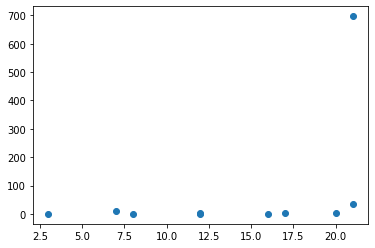

In [122]:
plt.scatter(x,y)